In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pprint

# Testing SIFT feature detector on an image

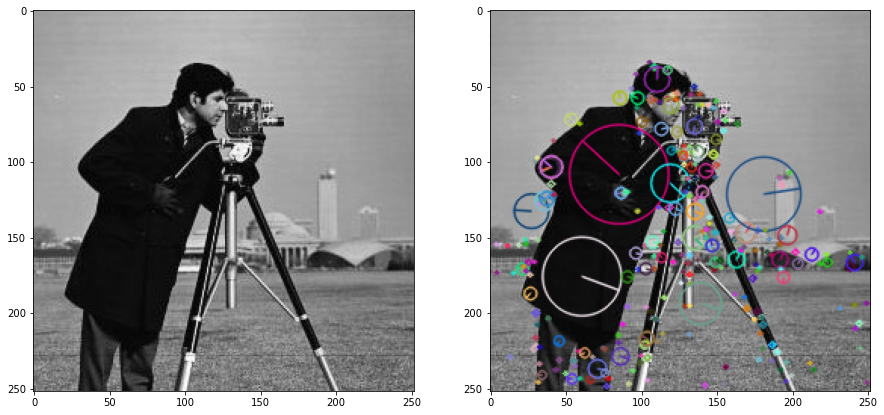

In [2]:
# Read the image and turn it to gray scale
img = cv2.imread('./images/cameraman.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create() # Create instance of the class SIFT feature detector

# FIRST STEP: Feature points detection
feature_points = sift.detect(img_gray, None)

# Draw the points on the image
featured_img = None
featured_img = cv2.drawKeypoints(img_gray, feature_points, featured_img,
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# For writing the image in a file
cv2.imwrite('./images/sift_keypoints.jpg', featured_img)

# Plot the results
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.subplot(122)
plt.imshow(featured_img, cmap='hsv')
plt.show()

In [3]:
# SECOND STEP: Feature descriptor extraction
sift_des = sift.compute(img_gray, feature_points)

# Let's check what we are storing in memory...

"""
The descriptor stores a tuple of two elements, the first one is the array of keypoints, we can check it with
sift_des[0]. The second element is the array of vector descriptors, each vector is the descriptor of the
keypoint with the same index on the keypoints array.
"""

# Array of keypoints (Printed only from the 90th to the 100th point)
for num, keypoint in enumerate(sift_des[0][90:110]):
    print(f"Kp {num+90}:" + 
          str([f"Angle: {keypoint.angle:.2f}", 
               f"Coords: ({keypoint.pt[0]:.2f}, {keypoint.pt[1]:.2f})",
               f"Size: {keypoint.size:.2f}",
               f"Octave: {keypoint.octave:.2f}"]
             ))

Kp 90:['Angle: 205.02', 'Coords: (96.06, 42.08)', 'Size: 2.01', 'Octave: 8061439.00']
Kp 91:['Angle: 65.47', 'Coords: (96.55, 64.12)', 'Size: 2.04', 'Octave: 9110015.00']
Kp 92:['Angle: 103.12', 'Coords: (97.06, 132.65)', 'Size: 2.07', 'Octave: 10355199.00']
Kp 93:['Angle: 327.25', 'Coords: (97.06, 132.65)', 'Size: 2.07', 'Octave: 10355199.00']
Kp 94:['Angle: 201.28', 'Coords: (97.23, 57.81)', 'Size: 8.24', 'Octave: 9961729.00']
Kp 95:['Angle: 20.50', 'Coords: (97.54, 170.99)', 'Size: 2.55', 'Octave: 8651519.00']
Kp 96:['Angle: 340.15', 'Coords: (98.19, 81.02)', 'Size: 1.87', 'Octave: 2753023.00']
Kp 97:['Angle: 4.70', 'Coords: (98.76, 232.91)', 'Size: 3.17', 'Octave: 7603199.00']
Kp 98:['Angle: 16.83', 'Coords: (99.39, 228.19)', 'Size: 1.91', 'Octave: 4456959.00']
Kp 99:['Angle: 340.54', 'Coords: (100.04, 73.37)', 'Size: 6.59', 'Octave: 10552064.00']
Kp 100:['Angle: 189.46', 'Coords: (100.22, 220.97)', 'Size: 2.19', 'Octave: 14483967.00']
Kp 101:['Angle: 6.89', 'Coords: (101.57, 230.0

In [4]:
# Array of feature vectors (each one related to the same indexed keypoint)
pprint.pprint(sift_des[1])

array([[ 2.,  4., 10., ...,  0., 20., 18.],
       [56., 22., 11., ...,  0.,  3.,  4.],
       [ 3.,  6.,  0., ..., 14., 19.,  5.],
       ...,
       [24., 58., 11., ...,  0.,  0.,  0.],
       [47., 20.,  0., ..., 44., 17.,  6.],
       [ 6., 19., 15., ...,  7., 13., 20.]], dtype=float32)


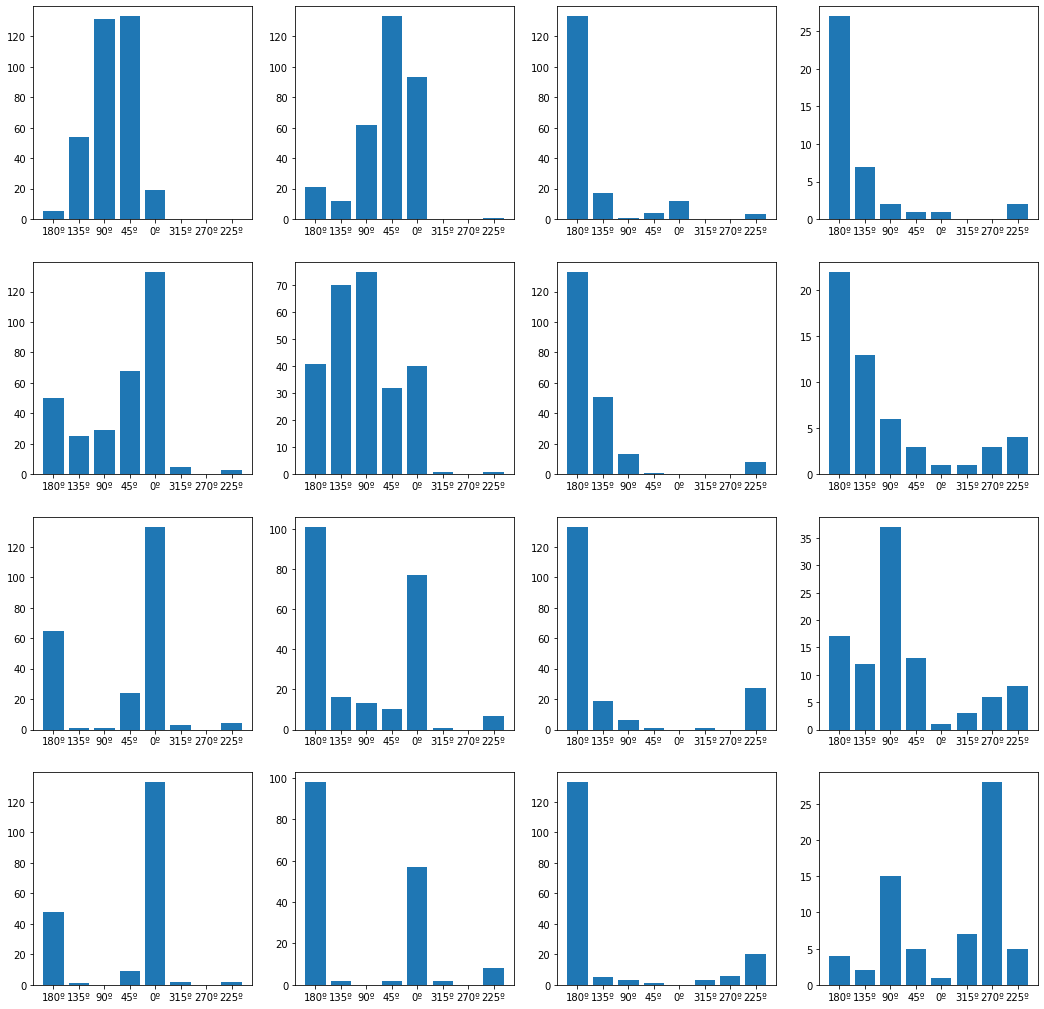

In [5]:
# Let's have a look at keypoint 100
feature_vector = sift_des[1][100]
bins = 8 # Values used for sampling the gradient orientation

# Histogram values, start on 180º and goes clockwise
x=["180º", "135º", "90º", "45º", "0º", "315º", "270º", "225º"]

# Sift descriptor of the 100th keypoint
plt.figure(figsize=(18,18))
for i in range(len(feature_vector)//bins):
    gradient_h = feature_vector[i*bins:i*bins+bins]
    plt.subplot(4,4,i+1)
    plt.bar(x, gradient_h)
plt.savefig('./images/descriptor.jpg')
plt.show()

In [6]:
from collections import defaultdict
import pprint

sum_dir = defaultdict(int)
for index, element in enumerate(feature_vector):
    sum_dir[x[index % 8]] += element

pprint.pprint(sum_dir)
print(sift_des[0][100].angle)

defaultdict(<class 'int'>,
            {'0º': 701.0,
             '135º': 307.0,
             '180º': 1031.0,
             '225º': 103.0,
             '270º': 43.0,
             '315º': 29.0,
             '45º': 440.0,
             '90º': 394.0})
189.462890625


# Matching of feature points using SIFT

Let's try to use our descriptors to find an object on an image.

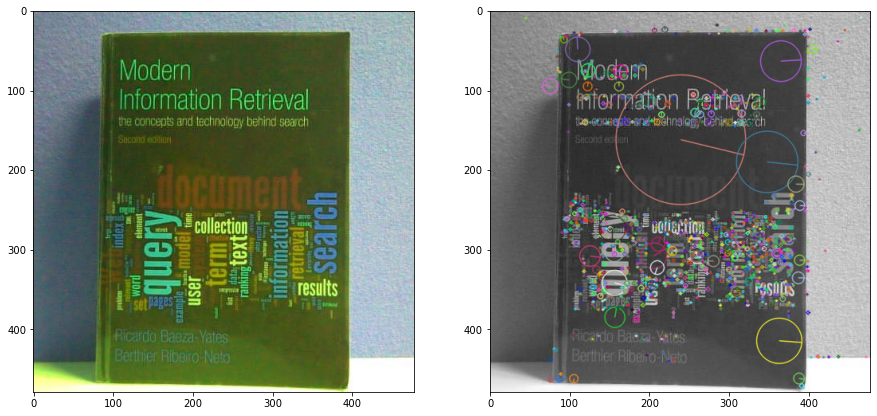

In [7]:
# Read the image of the object
img_object = cv2.imread('./images/book_object.jpg')
gray_object = cv2.cvtColor(img_object, cv2.COLOR_BGR2GRAY)

# Find the feature points and compute the descriptors
fp_obj, des_obj = sift.detectAndCompute(gray_object, None)

# Draw the feature points on the image
featured_img = None
featured_img = cv2.drawKeypoints(gray_object, fp_obj, featured_img,
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# For writing the image in a file
cv2.imwrite('./images/sift_keypoints_book.jpg', featured_img)

# Plot results
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img_object)
plt.subplot(122)
plt.imshow(featured_img, cmap='hsv')
plt.show()

*Note color image is in BGR color space*

Now, let's try to find the object using the descriptors we computed

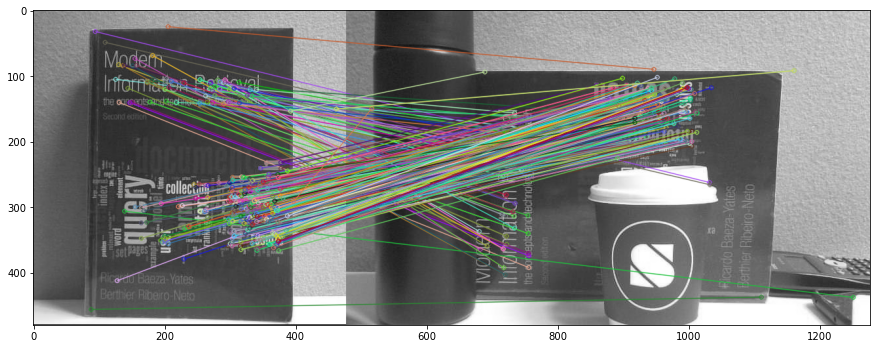

In [8]:
# Read an image where the object appears
img = cv2.imread('./images/book.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# We can use a method that detect and compute the descriptors directly

fp, des = sift.detectAndCompute(img_gray, None)

# We create an instance of a BruteForce matcher
bf = cv2.BFMatcher()

# Compute the matches between the descriptors
matches = bf.knnMatch(des_obj, des, k=2)

# Apply a radio test so we don't get many outliers
true_matches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        true_matches.append([m])
        
# cv.drawMatchesKnn expects list of lists as matches.
img_matches = cv2.drawMatchesKnn(gray_object, fp_obj, img_gray, fp,
                                true_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Plot results
plt.figure(figsize=(15,15))
plt.imshow(img_matches)
plt.savefig("./images/matches.jpg")
plt.show()